# Deep Learning 2021
## Assignment 4 - Convolutional Neural Networks

### 1. Activation Maps and Parameters

Consider the convolutional network defined by the layers in the left column below. Fill in the size of the activation maps and the number of parameters at each layer. You can write your answer as a multiplication (e.g. $128 \times 128 \times 3$).

1. CONV5-$N$ denotes a convolutional layer with $N$ filters, each of size  $5\times 5 \times D$ where $D$ is the depth of the activation map at the previous layer. Padding is $2$ and stride is $1$. 
2. POOL2 denotes $2 \times 2$  max-pooling layer with stride $2$ (pad $0$).

|Layer      | Dimensions of Activation  Map            | Number of parameters |
|-----------|:----------------------------------------:| --------------------:|
|Input      | $32 \times 32 \times 1$                  | 0                    |
|CONV5-$10$ | $32 \times 32 \times 10$                 |$26 \times 10$        |
|POOL2      | $16 \times 16 \times 10$                 |$5 \times 10$         |


#### Solution

Your solution goes here

### 2. CNN Forward Pass
In this exercise we address a convolutional neural network (CNN) with one-dimensional input. While two-dimensional CNNs can be used for example for grayscale images, one-dimensional CNNs could be used for time-series such as temperature or humidity readings. Concepts for the 1D-case are equivalent to 2D networks. We interpret data in our network as three-dimensional arrays where a row denotes a feature map, a column denotes a single dimension of the observation, and the depth of the array represents different observations. As we will only work with a single input vector, the depth will always be one.

Let the following CNN be given:
* Input $I$: Matrix of size $1 \times 1 \times 12$. We therefore have one input consisting of a single feature map with twelve dimensions.
* First convolutional layer with filters $F_0^1 = (-1, 0, 1)$ and $F_1^1 = (1, 0, -1)$ that generates two output feature maps from a single input feature map. Use valid mode for convolutions.
* Max-pooling layer with stride $2$ and filter size $2$. Note that max-pooling pools each feature map separately.
* Convolutional layer with convolutional kernel $F_0^2 = ((-1, 0, 1), (1, 0, -1))$ of size $2 \times 3 \times 1$.
* Fully connected layer that maps all of its inputs to two outputs. The first output is calculated as the negative sum of all its inputs, and the second output is calculated as the positive sum of all its inputs.
* A final sigmoid activation function

By hand, calculate the response of the CNN for the input $(0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0)$. Omid all bias terms in all layers.

#### Solution

First convolutional layer: 
$$
(0,  0,  1,  1,  0,  0,  -1,  -1,  0,  0)\\
(0,  0,  -1,  -1,  0,  0,  1,  1,  0,  0)
$$

Max-pooling layer:
$$
(0, 1, 0, -1, 0)\\
(0, -1, 0, 1, 0)
$$

Second convolutional layer:
$$
(0, -4, 0)
$$

Fully connected layer:
$$
(4, -4)
$$

output:
$$
(0.9820, 0.0180)
$$


### C0. Neural Networks with PyTorch
Continuing from the last assignment, work through the `What is torch.nn really?` tutorial notebook [link](https://pytorch.org/tutorials/beginner/nn_tutorial.html). You can also use [this link](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/5ddab57bb7482fbcc76722617dd47324/nn_tutorial.ipynb) to directly open it in Google Colab.


### C1. CNN Forward Pass
Implement task 2 in PyTorch to confirm your results. To accomplish this, you should

1. define the layers using `torch.nn`.
2. manually set the weights. To assign new weights, you have to wrap a tensor in `nn.Parameter()`. Remember to set the bias weights to zero (false).
3. perform a forward pass, printing the output after each layer.



In [68]:
import torch
import torch.nn as nn

x = torch.tensor([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=torch.float).unsqueeze(0).unsqueeze(0)
print(f'Input:\n{x}')
# ToDo: define conv net, manually set weights, run forward pass (printing intermediate outputs)


def sigmoid(h):
    return 1. / (1. + torch.exp(-h))


F_01 = [[-1., 0., 1.]]
F_01 = torch.FloatTensor(F_01).unsqueeze(0).unsqueeze(0)
F_01 = nn.Parameter(data=F_01, requires_grad=False)
conv1_1 = nn.functional.conv1d(x, F_01, padding=0)


F_11 = [[1., 0., -1.]]
F_11 = torch.FloatTensor(F_11).unsqueeze(0).unsqueeze(0)
F_11 = nn.Parameter(data=F_11, requires_grad=False)
conv1_2 = nn.functional.conv1d(x, F_11, padding=0)      

out1 = torch.cat((conv1_1[0][0], conv1_2[0][0]), 0)
print("output of the first convolutional layer: ")
print(out1)

mp = nn.MaxPool1d(2)
mp = nn.MaxPool1d(2)

mp1 = mp(conv1_1[0][0])
mp2 = mp(conv1_2[0][0])

out2 = torch.cat((mp1, mp2), 0)
print("output of the Max-pooling layer: ")
print(out2)

out2 = out2.unsqueeze(0).unsqueeze(0)
F_02 = [[-1, 0, 1], [1, 0, -1]]
F_02 = torch.FloatTensor(F_02).unsqueeze(0).unsqueeze(0)
F_02 = nn.Parameter(data=F_02, requires_grad=False)
out3 = nn.functional.conv2d(out2, F_02, padding=0)[0][0]
print("output of the second Convolutional layer: ")
print(out3)

W1 = torch.tensor([[-1.], [-1.], [-1.]])
W2 = torch.tensor([[1.], [1.], [1.]])

out4_1 = torch.matmul(out3, W1)[0]
out4_2 = torch.matmul(out3, W2)[0]

out4 = torch.cat((out4_1, out4_2), 0).unsqueeze(0)
print("output of the fully connected layer: ")
print(out4)

out5 = sigmoid(out4).unsqueeze(0)
print("final output:")
print(out5)

Input:
tensor([[[[0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.]]]])
output of the first convolutional layer: 
tensor([[ 0.,  0.,  1.,  1.,  0.,  0., -1., -1.,  0.,  0.],
        [ 0.,  0., -1., -1.,  0.,  0.,  1.,  1.,  0.,  0.]])
output of the Max-pooling layer: 
tensor([[ 0.,  1.,  0., -1.,  0.],
        [ 0., -1.,  0.,  1.,  0.]])
output of the second Convolutional layer: 
tensor([[ 0., -4.,  0.]])
output of the fully connected layer: 
tensor([[ 4., -4.]])
final output:
tensor([[[0.9820, 0.0180]]])


### C2. Training an Image Classifier
The CIFAR 10 dataset is an image dataset containing images from 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. Your task is to train a CNN to classify given input images into one of these 10 classes.


The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size. More information on CIFAR 10 can be found over [here](https://www.cs.toronto.edu/~kriz/cifar.html). This means we have to create a CNN with 2D convolutions and 3 input channels.

Starting of from an already loaded dataset, your tasks are:
 
1.  Create a training and validation dataloader using `torch.utils.data.DataLoader` to retrieve batches of data. Use a batch size of 32. Make sure to have the training set shuffled after every epoch.

2.  Define a CNN using `torch.nn`. You can use `nn.Sequential` as a container for your layers or define your own `nn.Module`. The network should have the following architecture:
    1. A 2-d convolutional layer with 48 output channels, a kernel size of (3x3) and (1x1) padding.
    2. A second 2-d convolutional layer with 96 output channels, a kernel size of (3x3) and (1x1) padding.
    3. A Max-Pooling layer with a 2x2 kernel.
    4. A third 2-d convolutional layer with 192 output channels, a kernel size of (3x3) and (1x1) padding.
    5. A Max-Pooling layer with a 2x2 kernel.
    6. A fully connected layer with output dimension of 64.
    7. A final, fully connected classification layer, with output dimension of 10 (one for each class).

    Directly after every conv and fully connected layer, apply a ReLU non-linearity. Do not apply a non-linearity after the final layer.
    
    Remember to flatten your hidden representations before the first fully connected layer. Hint: `nn.Flatten`

    To accelerate the training, we recommend using a GPU.

3.  Define loss function and optimizer. Use cross entropy loss and SGD as the optimizer. Use a learning rate of 0.01 and set the momentum parameter of `torch.optim.SGD` to 0.9 .

4.  Train the CNN for 5 epochs.

5.  Validate your trained model by computing the accuracy on the validation dataset.



#### Solution

Loading the dataset. For development and debugging, you can set `use_subset = True` to work with a small subset of the data (100 examples). For your final training run, set it back to `False`.

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

use_subset = False # Set this to True for debugging purposes.

transform = transforms.ToTensor()

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
classes = train_dataset.classes

if use_subset:
    train_dataset = torch.utils.data.Subset(train_dataset, torch.arange(0, 100))
    val_dataset = torch.utils.data.Subset(val_dataset, torch.arange(0, 100))

print(f'classes: {classes}\nnumber of instances:\n\ttrain: {len(train_dataset)}\n\tval: {len(val_dataset)}')

Files already downloaded and verified
Files already downloaded and verified
classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
number of instances:
	train: 50000
	val: 10000


Visualizing a few examples:

image of shape: torch.Size([3, 32, 32])
label: horse


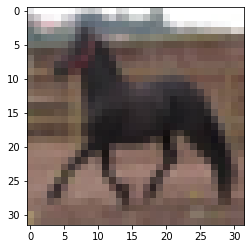

image of shape: torch.Size([3, 32, 32])
label: deer


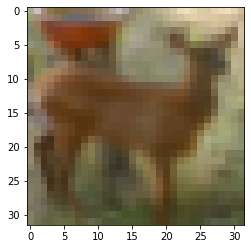

image of shape: torch.Size([3, 32, 32])
label: airplane


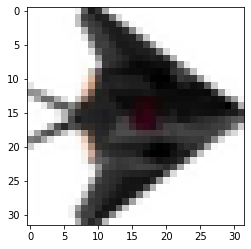

image of shape: torch.Size([3, 32, 32])
label: bird


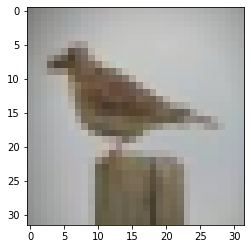

In [9]:
import matplotlib.pyplot as plt

def show_examples(n):
    for i in range(n):
        index = torch.randint(0, len(train_dataset), size=(1,)) # select a random example
        image, target = train_dataset[index]
        print(f'image of shape: {image.shape}')
        print(f'label: {classes[target]}')
        plt.imshow(image.permute(1,2,0).numpy())
        plt.show()

show_examples(4)

Note that the images are only 32x32 pixels, so they look quite pixelated.


#### Here are your tasks:

Creating dataloaders:

epoch 0: 


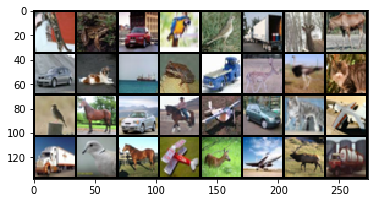

epoch 1: 


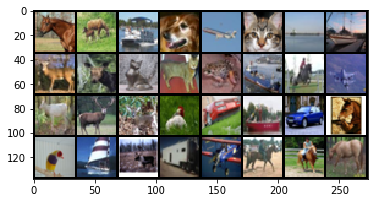

epoch 2: 


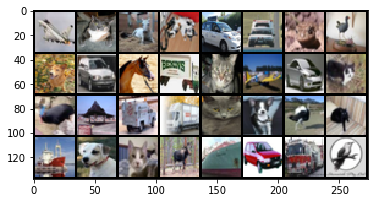

In [10]:
import torch
from torch.utils.data import DataLoader
import numpy as np

BATCH_SIZE = 32
 
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)


for step ,(batch_x,batch_y) in enumerate(train_loader):
    if step < 3:
        imgs = torchvision.utils.make_grid(batch_x)
        imgs = np.transpose(imgs,(1,2,0))
        print("epoch %d: " % step)
        plt.imshow(imgs)
        plt.show()

Defining the CNN:

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(48, 96, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=8*8*192, out_features=64),
            nn.ReLU()
        )

        self.output = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        out = self.output(x)
        return out

Defining loss function and optimizer:

In [12]:
import torch.optim as optim

my_net = net()

optimizer = optim.SGD(my_net.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

Training:

In [74]:
#I didn't run this Session on Jupyter, it took too long time.
#But I ran it on local, the training process and validation result are good.
#I have also the local python file updated, the code inside it is the same as here.
#Please rerun the python file or
#this cell and all the cells below it.

In [ ]:
for epoch in range(5):
    print("training epoch %d: " % epoch)
    for step, (batch_x, batch_y) in enumerate(train_loader):
        output = my_net(batch_x)
        loss = loss_function(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if step % 50 == 0:
        print("train loss = %.4f" % loss)


training epoch 0: 


Validation:

In [ ]:
loss = 0
accuracy = 0

for step, (batch_x, batch_y) in enumerate(test_loader):
    output = my_net(batch_x)
    batch_len = batch_y.size()[0]
    y_predict = torch.zeros(batch_len)
    y_correct = 0
    for item in range(batch_len):
        y_predict[item] = torch.argmax(output[item])
        if y_predict[item] == batch_y[item]:
            y_correct = y_correct + 1
    accuracy = accuracy + y_correct / batch_len
    loss = loss + loss_function(output, batch_y)
    n = step

loss = loss / n
accuracy = accuracy / n

In [ ]:
print("total loss: %.4f" % loss)
print("total accuracy: %.4f" % accuracy)